In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/dogs')))
print(len(os.listdir('/content/drive/MyDrive/train/cats')))
print(len(os.listdir('/content/drive/MyDrive/test/dogs')))
print(len(os.listdir('/content/drive/MyDrive/test/cats')))

500
491
40
40


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 793 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
25/25 [==============================] - 169s 7s/step - loss: 0.7551 - accuracy: 0.5019 - val_loss: 0.6924 - val_accuracy: 0.5101
Epoch 2/30
25/25 [==============================] - 156s 6s/step - loss: 0.6916 - accuracy: 0.5246 - val_loss: 0.6821 - val_accuracy: 0.6010
Epoch 3/30
25/25 [==============================] - 160s 6s/step - loss: 0.6708 - accuracy: 0.5637 - val_loss: 0.6814 - val_accuracy: 0.5657
Epoch 4/30
25/25 [==============================] - 147s 6s/step - loss: 0.6215 - accuracy: 0.6583 - val_loss: 0.6460 - val_accuracy: 0.6212
Epoch 5/30
25/25 [==============================] - 157s 6s/step - loss: 0.4912 - accuracy: 0.7856 - val_loss: 0.7478 - val_accuracy: 0.5455
Epoch 6/30
25/25 [==============================] - 158s 6s/step - loss: 0.3989 - accuracy: 0.8184 - val_loss: 0.7529 - val_accuracy: 0.6313
Epoch 7/30
25/25 [==============================] - 148s 6s/step - loss: 0.3068 - accuracy: 0.8714 - val_loss: 0.7715 - val_accuracy: 0.7020
Epoch 8/30
25

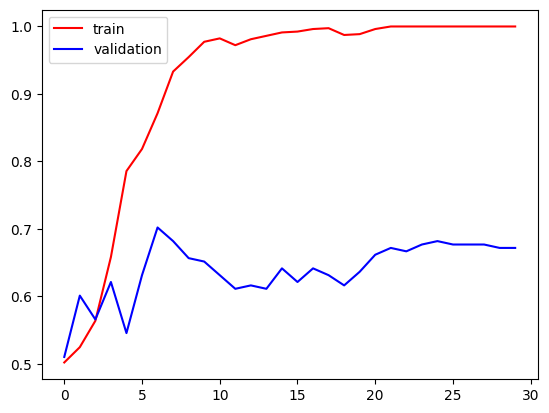

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

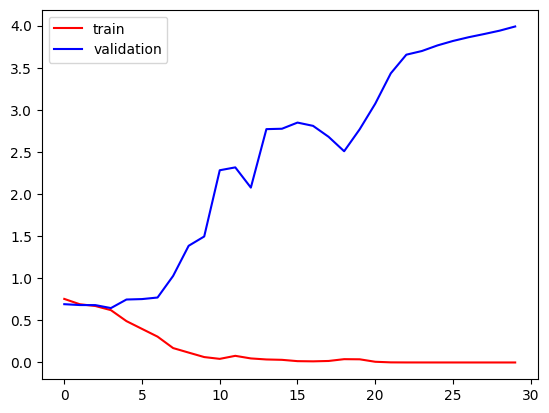

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

3/3 [==============================] - 12s 5s/step
[[8.8087922e-01]
 [9.9995542e-01]
 [6.6216751e-03]
 [9.9682033e-01]
 [9.9999934e-01]
 [2.9281677e-34]
 [9.9999988e-01]
 [1.0000000e+00]
 [6.6215765e-01]
 [8.6950731e-01]
 [9.8892725e-01]
 [1.0000000e+00]
 [5.5626136e-01]
 [3.7945461e-02]
 [1.0000000e+00]
 [4.8038964e-06]
 [7.1801776e-05]
 [9.9992162e-01]
 [1.2741400e-03]
 [5.1735550e-01]
 [3.9517907e-03]
 [9.9999475e-01]
 [9.0276664e-01]
 [5.3690661e-02]
 [5.8307303e-10]
 [1.5632885e-17]
 [9.9954194e-01]
 [9.9999779e-01]
 [9.9999869e-01]
 [9.9999988e-01]
 [7.4949142e-08]
 [1.0000000e+00]
 [4.6216372e-10]
 [5.5906938e-08]
 [9.9998981e-01]
 [2.3634012e-26]
 [8.0124205e-01]
 [1.5778935e-08]
 [6.0334706e-01]
 [7.1299888e-15]
 [9.9641651e-01]
 [2.6856476e-01]
 [1.8421044e-07]
 [9.0009480e-16]
 [9.9990571e-01]
 [3.2574215e-03]
 [1.3866763e-08]
 [4.4051805e-04]
 [4.9833614e-07]
 [1.0000000e+00]
 [1.8505611e-02]
 [9.7828537e-01]
 [1.8914048e-02]
 [9.9950498e-01]
 [5.2385833e-05]
 [9.9085343e-0

In [ ]:
len(predictions)

80

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[16 24]
 [21 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.40      0.42        40
           1       0.44      0.47      0.46        40

    accuracy                           0.44        80
   macro avg       0.44      0.44      0.44        80
weighted avg       0.44      0.44      0.44        80

